## Problem Statement

The objective of this project is to predict the probability of loan default
using borrower demographic, financial, and loan-related attributes.
The model aims to help financial institutions assess credit risk
and make data-driven lending decisions.


In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


In [2]:
# Import required packages
# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib
print(matplotlib.__version__)

3.10.8


In [3]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Exploratory Data Analysis & Data Validation


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt


In [6]:
mpl.rcParams["figure.figsize"] = (12, 10)
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [7]:
neg, pos = np.bincount(train_df["Default"])
total = neg + pos
print(
    "Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n".format(
        total, pos, 100 * pos / total
    )
)

Examples:
    Total: 255347
    Positive: 29653 (11.61% of total)



In [8]:
# Check for duplicate rows based on all columns
duplicate_rows = train_df.duplicated()
num_duplicate_rows = duplicate_rows.sum()
# do same for test_df
duplicate_rows_test = test_df.duplicated()
num_duplicate_rows_test = duplicate_rows_test.sum()

# Display the number of duplicate rows
print(num_duplicate_rows)

# Display the number of duplicate rows
print(num_duplicate_rows_test)

0
0


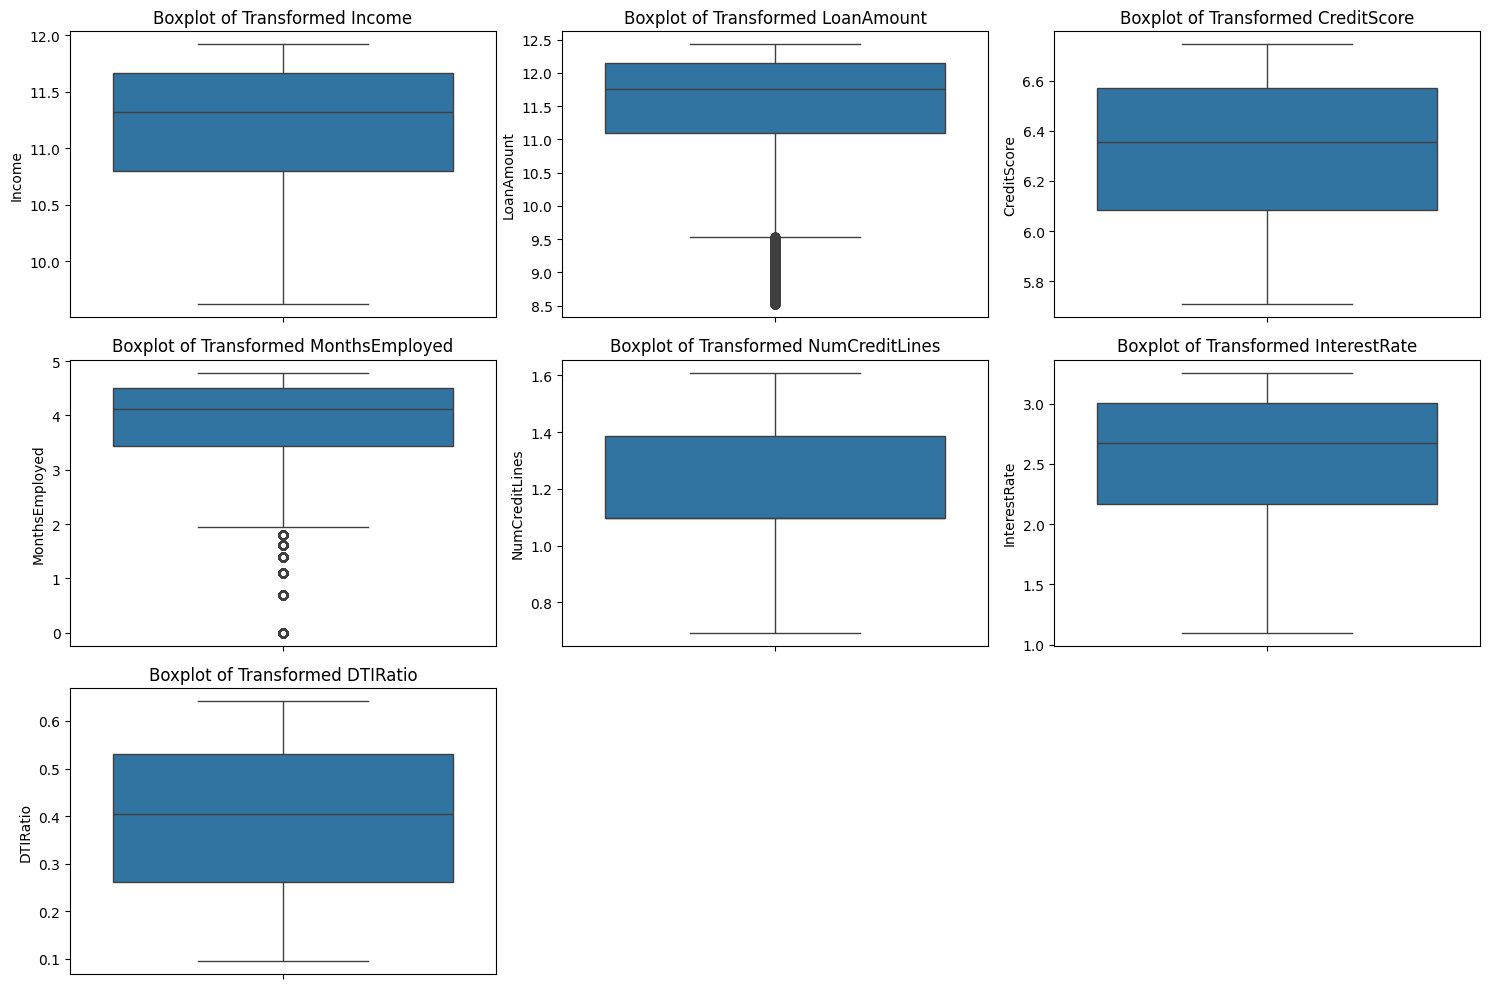

In [9]:
# Applying log transformation to reduce skewness in numerical features

transform_cols = [
    "Income",
    "LoanAmount",
    "CreditScore",
    "MonthsEmployed",
    "NumCreditLines",
    "InterestRate",
    "DTIRatio",
]


train_df_transformed = train_df.copy()
for col in transform_cols:
    train_df_transformed[col] = np.log1p(train_df_transformed[col])


test_df_transformed = test_df.copy()
for col in transform_cols:
    test_df_transformed[col] = np.log1p(test_df_transformed[col])



plt.figure(figsize=(15, 10))
for i, col in enumerate(transform_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=col, data=train_df_transformed)
    plt.title(f"Boxplot of Transformed {col}")

plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

# Standardizing numerical features for model stability

categorical_cols = [
    "Education",
    "EmploymentType",
    "MaritalStatus",
    "HasMortgage",
    "HasDependents",
    "LoanPurpose",
    "HasCoSigner",
]


label_encoder = LabelEncoder()
train_df_encoded = train_df_transformed.copy()
for col in categorical_cols:
    train_df_encoded[col] = label_encoder.fit_transform(train_df_encoded[col])

test_df_encoded = test_df_transformed.copy()
for col in categorical_cols:
    test_df_encoded[col] = label_encoder.fit_transform(test_df_encoded[col])


train_df_encoded.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,11.362044,10.831470,6.255750,4.394449,1.609438,2.786861,36,0.364643,0,0,0,1,1,4,1,0
1,HPSK72WA7R,69,10.828401,11.731587,6.129050,2.772589,0.693147,1.759581,60,0.518794,2,0,1,0,0,4,1,0
2,C1OZ6DPJ8Y,46,11.341057,11.769032,6.113682,3.295837,1.386294,3.098740,24,0.270027,2,3,0,1,1,0,0,1
3,V2KKSFM3UN,32,10.364514,10.709963,6.612041,0.000000,1.386294,2.088153,24,0.207014,1,0,1,0,0,1,0,0
4,EY08JDHTZP,60,9.925151,9.120416,6.452049,2.197225,1.609438,2.016235,48,0.548121,0,3,0,0,1,0,0,0


In [11]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to be scaled
# Excluding the 'Default' column as it is the target variable
numerical_cols = [
    "Age",
    "Income",
    "LoanAmount",
    "CreditScore",
    "MonthsEmployed",
    "NumCreditLines",
    "InterestRate",
    "LoanTerm",
    "DTIRatio",
]

scale_cols = numerical_cols

# Applying standard scaling
scaler = StandardScaler()
train_df_scaled = train_df_encoded.copy()
train_df_scaled[scale_cols] = scaler.fit_transform(train_df_scaled[scale_cols])

test_df_scaled = test_df_encoded.copy()
test_df_scaled[scale_cols] = scaler.fit_transform(test_df_scaled[scale_cols])

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Features and Target variable
X = train_df_scaled.drop(["LoanID", "Default"], axis=1)
y = train_df_scaled["Default"]

# Identifying important features using Random Forest feature importance

rf_selector = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

rf_selector.fit(X, y)


feature_importances = rf_selector.feature_importances_

features_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})

features_df = features_df.sort_values(by="Importance", ascending=False)

important_features = features_df.head(10)
important_features

,Feature,Importance
1,Income,0.131455
6,InterestRate,0.125897
2,LoanAmount,0.120491
3,CreditScore,0.103909
0,Age,0.099757
4,MonthsEmployed,0.098170
8,DTIRatio,0.090078
7,LoanTerm,0.038423
14,LoanPurpose,0.037919
5,NumCreditLines,0.031319


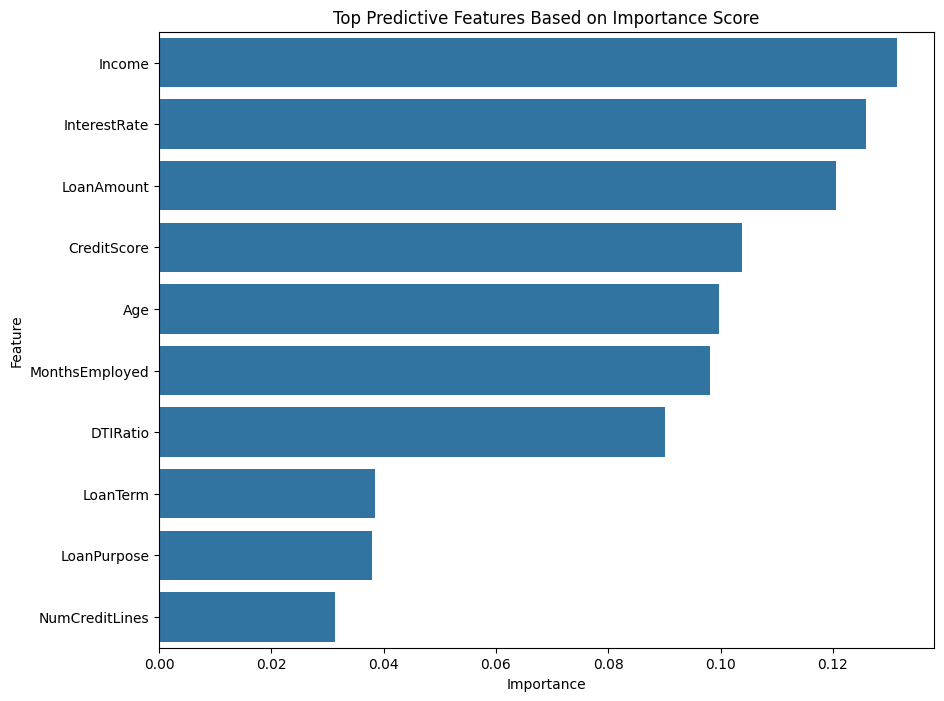

In [13]:
# Select only the top 10 important features based on feature importance
selected_features = important_features["Feature"].tolist()
X_selected = X[selected_features]

# visualing the selected features
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=important_features)
plt.title("Top Predictive Features Based on Importance Score")
plt.show()

In [14]:
test_df_selected = test_df_scaled[selected_features] # this is the real test data

In [15]:
# Spliting the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Showing the shape of the resulting sets
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(204277, 10) (51070, 10) (204277,) (51070,)


In [16]:
"""
Compute sample weights based on class weights.
- To handle class imbalance
"""
from sklearn.utils.class_weight import compute_sample_weight

sample_weights_train = compute_sample_weight(class_weight="balanced", y=y_train)
sample_weights_val = compute_sample_weight(class_weight="balanced", y=y_val)
print(sample_weights_train[:10])
print(sample_weights_train.shape)

[0.56569189 0.56569189 0.56569189 0.56569189 4.30564455 0.56569189
 0.56569189 0.56569189 0.56569189 0.56569189]
(204277,)


In [17]:
import sys
print(sys.executable)


C:\Users\06piy\.conda\envs\loan_ml\python.exe


In [19]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Training ensemble model using XGBoost with bagging for improved generalization

# Creating a pipeline with the best parameters
best_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        (
            "classifier",
            XGBClassifier(
                learning_rate=0.1, max_depth=3, n_estimators=200, reg_lambda=1
            ),
        ),
    ]
)


xgb_classifier = best_pipeline.named_steps["classifier"]


bagging_classifier = BaggingClassifier(
    estimator=xgb_classifier,
    n_estimators=10,
    random_state=42
)


# Training the BaggingClassifier model using the training data
bagging_classifier.fit(X_train, y_train, sample_weight=sample_weights_train)

# Predictions
y_train_pred = bagging_classifier.predict(X_train)
y_val_pred = bagging_classifier.predict(X_val)

weighted_accuracy_train = accuracy_score(
    y_train, y_train_pred, sample_weight=sample_weights_train
)
weighted_accuracy_val = accuracy_score(
    y_val, y_val_pred, sample_weight=sample_weights_val
)

# Evaluating the model
print("Training Accuracy: ", weighted_accuracy_train)
print("Validation Accuracy: ", weighted_accuracy_val)

print(
    "\nTraining Classification Report: \n", classification_report(y_train, y_train_pred)
)
print(
    "\nValidation Classification Report: \n", classification_report(y_val, y_val_pred)
)

Training Accuracy:  0.6869191353946974
Validation Accuracy:  0.6846361557596299

Training Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.69      0.80    180555
           1       0.23      0.68      0.34     23722

    accuracy                           0.69    204277
   macro avg       0.58      0.69      0.57    204277
weighted avg       0.86      0.69      0.75    204277


Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.69      0.80     45139
           1       0.22      0.68      0.34      5931

    accuracy                           0.69     51070
   macro avg       0.58      0.68      0.57     51070
weighted avg       0.86      0.69      0.74     51070



In [20]:
train_df_scaled.head()

print(train_df_scaled.columns)

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')


In [21]:

X_test = test_df_scaled[X_train.columns]
predicted_probability = bagging_classifier.predict_proba(X_test)[:, 1]  # best so far

In [22]:

prediction_df = pd.DataFrame({'LoanID': test_df_scaled[['LoanID']].values[:, 0],
                        'predicted_probability': predicted_probability})

In [23]:

print(prediction_df.shape)
prediction_df.head(10)

(109435, 2)


,LoanID,predicted_probability
0,7RYZGMKJIR,0.328928
1,JDL5RH07AM,0.163475
2,STAL716Y79,0.268530
3,SO0KKJ3IQB,0.528234
4,T99CWTYDCP,0.419252
5,0SNHFWV4UP,0.417422
6,S6ITP6LGYS,0.184377
7,A6I7U12IRJ,0.330572
8,8W6KY50JU4,0.583036
9,THFQ08OLMU,0.454306


In [24]:
# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [25]:
assert submission.columns[0] == "LoanID", "The first column name should be CustomerID."
assert (
    submission.columns[1] == "predicted_probability"
), "The second column name should be predicted_probability."

In [26]:
assert (
    submission.shape[0] == 109435
), "The dataframe prediction_df should have 109435 rows."

In [27]:
assert submission.shape[1] == 2, "The dataframe prediction_df should have 2 columns."

In [28]:
X_test = test_df_scaled[X_train.columns]

predicted_probability = bagging_classifier.predict_proba(X_test)[:, 1]

prediction_df = pd.DataFrame({
    "LoanID": test_df_scaled["LoanID"],
    "predicted_probability": predicted_probability
})

prediction_df.head()


,LoanID,predicted_probability
0,7RYZGMKJIR,0.328928
1,JDL5RH07AM,0.163475
2,STAL716Y79,0.268530
3,SO0KKJ3IQB,0.528234
4,T99CWTYDCP,0.419252


In [29]:
prediction_df.shape


(109435, 2)